<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from scipy.optimize import minimize

Mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Get data

In [3]:
mat = loadmat('/content/drive/My Drive/Colab Notebooks/data/ex8_movies.mat')
Y = mat['Y']
R = mat['R']
num_movies, num_users = Y.shape
print(f'Number of Movies: {num_movies}')
print(f'Number of Users: {num_users}')

Number of Movies: 1682
Number of Users: 943


Setup parameters

In [0]:
x = np.random.normal(size=(num_movies, num_movies))
theta = np.random.normal(size=(num_users, num_movies))

Define cost, grad_x, and grad_theta functions

In [0]:
alpha = 0.0005
reg_param = 100

def cost(x, theta):
  return (1/num_users/num_movies) * ((1/2) * np.sum((np.dot(x, theta.T)*R - Y) ** 2) + (reg_param/2) * np.sum(x**2) + (reg_param/2) * np.sum(theta**2))

def grad_x(x, theta):
  return ((x @ theta.T) * R - Y) @ theta + reg_param * x

def grad_theta(x, theta):
  return ((x @ theta.T) * R - Y).T @ x + reg_param * theta

Perform Gradient Descent

In [6]:
print(f'Initial Cost = {cost(x, theta)}')

costs = []
iterations = 50
print_every = iterations//10
for i in range(1, iterations + 1):
  g_x = grad_x(x, theta)
  g_theta = grad_theta(x, theta)
  x -= alpha * g_x
  theta -= alpha * g_theta
  costs.append(cost(x, theta))
  if i % print_every == 0:
    print(f'Iteration {i}, Cost = {costs[-1]}')

Initial Cost = 192.43911861484136
Iteration 5, Cost = 75.90805089223191
Iteration 10, Cost = 45.46953993001068
Iteration 15, Cost = 27.282889145246045
Iteration 20, Cost = 16.4069574035862
Iteration 25, Cost = 9.905179481542437
Iteration 30, Cost = 6.018464307194338
Iteration 35, Cost = 3.693845121330179
Iteration 40, Cost = 2.3018755241251414
Iteration 45, Cost = 1.4668402267479221
Iteration 50, Cost = 0.9646983428775846


Graph Cost Over Time

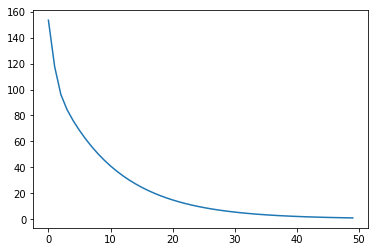

In [7]:
sns.lineplot(x=range(iterations), y=costs)